In [1]:
import imageio
import numpy as np
import porespy as ps
import openpnm as op
import scipy.ndimage as spim
import matplotlib.pyplot as plt
from porespy.filters import find_peaks, trim_saddle_points, trim_nearby_peaks
from porespy.tools import randomize_colors
from skimage.segmentation import watershed
ps.visualization.set_mpl_style()

map_to_regions maps the network of pore values of an image.

# Set up regions and values:

In [2]:
np.random.seed(10)
im = ps.generators.cylinders(shape=[100, 100, 100], radius=3, ncylinders=50)

dt = spim.distance_transform_edt(input=im)
dt = spim.gaussian_filter(input=dt, sigma=0.4)
peaks = find_peaks(dt=dt)

peaks = trim_saddle_points(peaks=peaks, dt=dt, max_iters=500)
peaks = trim_nearby_peaks(peaks=peaks, dt=dt)
peaks, N = spim.label(peaks)

regions = watershed(image=-dt, markers=peaks, mask=dt > 0)
nreg = regions.max() + 1
values = np.random.rand(nreg,1)

50it [00:01, 39.57it/s]                                                                                                                                        


# Plotting the pore network:

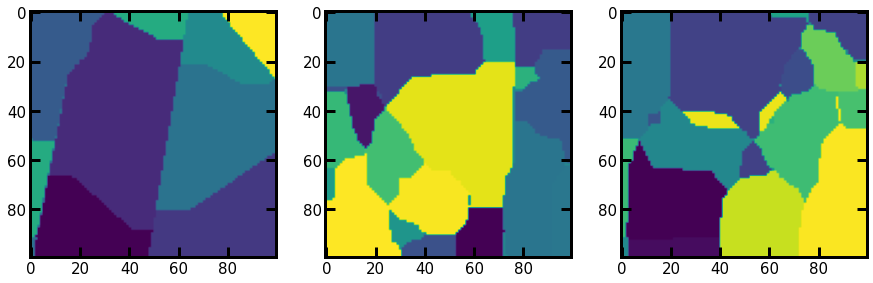

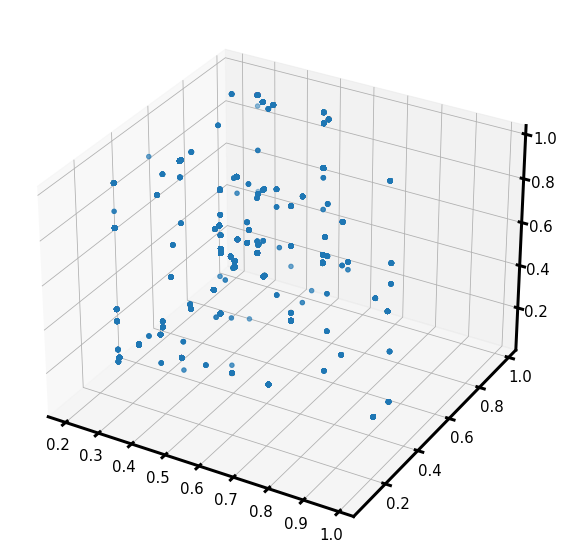

In [3]:
w = ps.networks.map_to_regions(regions, values)

xy = w[:, :, 0]
yz = w[0, :, :]
zx = w[:, 0, :]

fig, ax = plt.subplots(1, 3, figsize=[15, 15]);
ax[0].imshow(xy)
ax[1].imshow(yz)
ax[2].imshow(zx)

fig = plt.figure(figsize=[10, 10])
ax = fig.gca(projection='3d')

ax.scatter(xy,yz,zx)
plt.show()
